In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

: 

In [2]:
# 平均次数を求める関数
def average_deg(G):
    return 2*len(G.edges()) / len(G.nodes())

# グラフの概要を表示する関数
def info(G):
    print(f'Number of nodes: {len(G.nodes())}')
    print(f'Number of edges: {len(G.edges())}')
    print(f'Average degree: {average_deg(G)}')
    
# 次数分布を描画する関数
def plot_dd(G, bins):
    fs = 20 # font size
    
    degree = dict(nx.degree(G))    
    plt.hist(degree.values(), bins=bins, color='teal', ec='black')
    plt.xlabel('Degree', fontsize=fs)
    plt.ylabel('# nodes', fontsize=fs)

## NetworkXの組み込み関数から生成
ランダム・ネットワークは組み込み関数`networkx.erdos_renyi_graph()`で簡単に作ることができる

Number of nodes: 12
Number of edges: 12
Average degree: 2.0


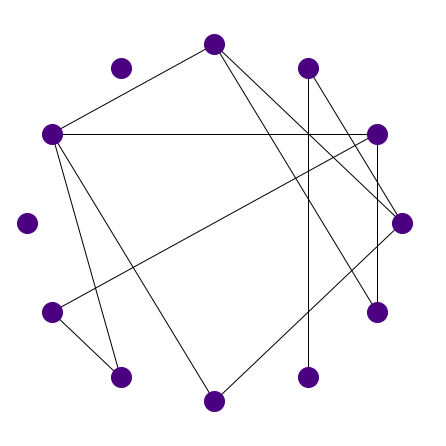

In [4]:
n = 12
p = 1/6

G1 = nx.erdos_renyi_graph(n, p)

info(G1)
plt.figure(figsize=(6,6))
nx.draw_circular(G1,node_size=400, node_color='indigo', edge_color='k')
plt.show()

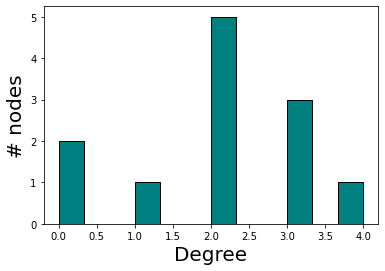

In [5]:
# 次数分布
plot_dd(G1,12)

## ランダム・ネットワークを自分で作る（教科書p79）
`np.random.rand()`で一様分布から0.0以上、1.0未満の乱数を生成

In [7]:
# ランダム・ネットワーク生成関数
def gen_ER_network(n, p, seed=None):
    if seed != None:
        np.random.seed(seed=seed)
        # np.random.seed(0)のように乱数のseed値を固定すると常に同じ乱数を発生させることができる
        
    # 空のグラフを生成して、n個のノードを追加
    G = nx.Graph()
    G.add_nodes_from(list(range(n)))
    
    edge_list = []
    
    r'''
    n(n-1)/2通りのすべてのノードの組み合わせについて手順2（教科書p79）を繰り返す
    '''
    
    for i in range(n):
        for j in range(i+1, n):
            if np.random.rand() < p:
                edge_list.append((i,j))
    
    G.add_edges_from(edge_list)
    
    return G

Number of nodes: 12
Number of edges: 9
Average degree: 1.5


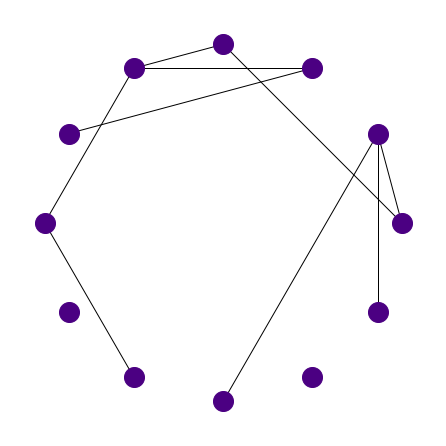

In [13]:
n = 12
p = 1/6

G2 = gen_ER_network(n, p)
info(G2)
plt.figure(figsize=(6,6))
nx.draw_circular(G2,node_size=400, node_color='indigo', edge_color='k')

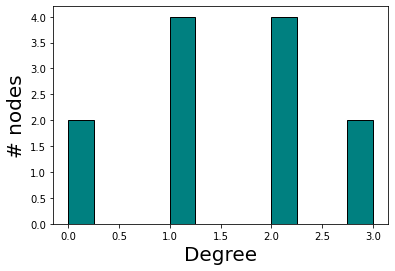

In [14]:
# 次数分布
plot_dd(G2, 12)